In [1]:
# Uncomment to upgrade packages
# !pip install pandas --upgrade --user --quiet
# !pip install numpy --upgrade --user --quiet
# !pip install scipy --upgrade --user --quiet
# !pip install statsmodels --upgrade --user --quiet
# !pip install scikit-learn --upgrade --user --quiet
# !pip install --upgrade --quiet pillow
# !pip install --upgrade --quiet scikit-learn
# !pip install --upgrade --quiet lime

%load_ext autoreload

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from IPython.core.display import display, HTML
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from scipy.stats import uniform
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

show_html = lambda html: display(HTML(html))
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)
sns.set()

# Pima Indians Diabetes

In [3]:
data = pd.read_csv("dataset/diabetes.csv", header=0)
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(data.describe().to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  Pregnancies &  Glucose &  BloodPressure &  SkinThickness &  Insulin &      BMI &  DiabetesPedigreeFunction &      Age &  Outcome \\
\midrule
count &      768.000 &  768.000 &        768.000 &        768.000 &  768.000 &  768.000 &                   768.000 &  768.000 &  768.000 \\
mean  &        3.845 &  120.895 &         69.105 &         20.536 &   79.799 &   31.993 &                     0.472 &   33.241 &    0.349 \\
std   &        3.370 &   31.973 &         19.356 &         15.952 &  115.244 &    7.884 &                     0.331 &   11.760 &    0.477 \\
min   &        0.000 &    0.000 &          0.000 &          0.000 &    0.000 &    0.000 &                     0.078 &   21.000 &    0.000 \\
25\%   &        1.000 &   99.000 &         62.000 &          0.000 &    0.000 &   27.300 &                     0.244 &   24.000 &    0.000 \\
50\%   &        3.000 &  117.000 &         72.000 &         23.000 &   30.500 &   32.000 &                    

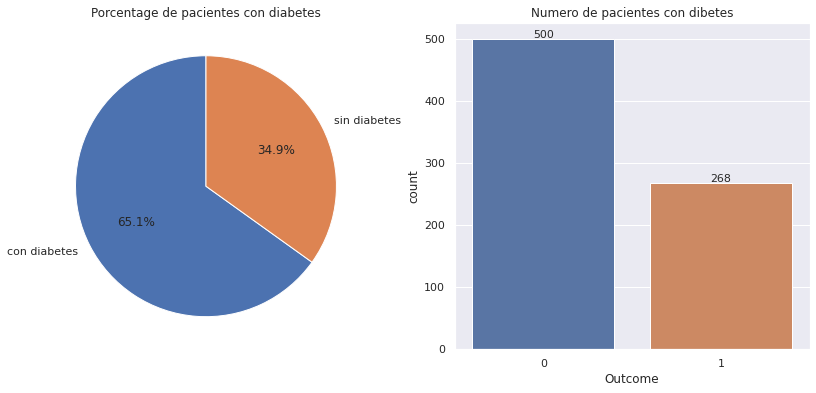

In [6]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.pie(data['Outcome'].value_counts(), autopct = "%1.1f%%",labels=["con diabetes","sin diabetes"], startangle = 90)
t1 = ax1.set_title('Porcentage de pacientes con diabetes')

sns.countplot(data['Outcome'],ax = ax2)
t2 = ax2.set_title('Numero de pacientes con dibetes')
# show count (+ annotate)
for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)


plt.show();

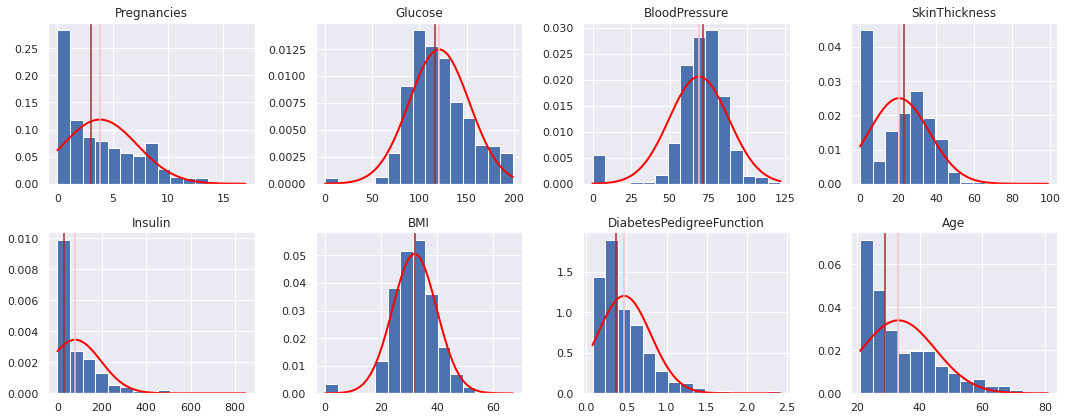

In [7]:
fig, axes = plt.subplots(2,4,figsize=(15,6))

# We will not plot the target
for i, c in enumerate(data.columns[:-1]):
    ax = axes.reshape(-1)[i]
    count, bins, ignore = ax.hist(data[c], 15, density=True)
    sigma=  data[c].std()
    mu=  data[c].mean()
    dbins = np.linspace(bins[0], bins[-1])
    ax.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (dbins - mu)**2
                         / (2 * sigma**2) ), linewidth=2, color='red')
    ax.axvline(data[c].mean(),color='pink')
    ax.axvline(data[c].median(),color='brown')

    t = ax.set_title(c)
plt.tight_layout()



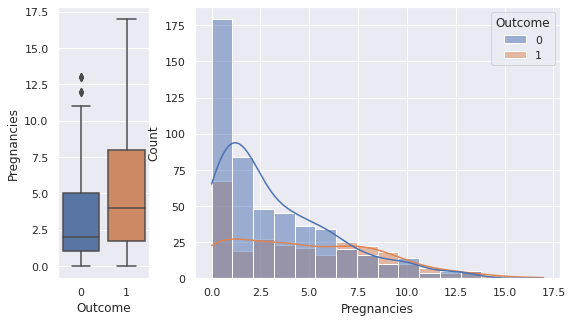

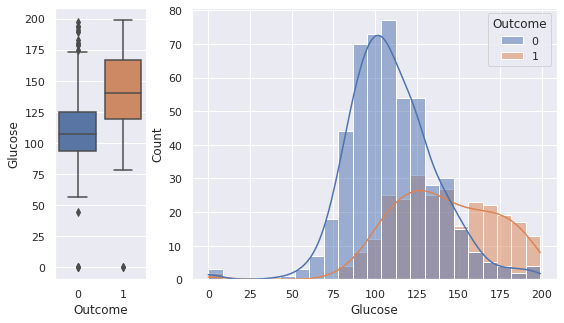

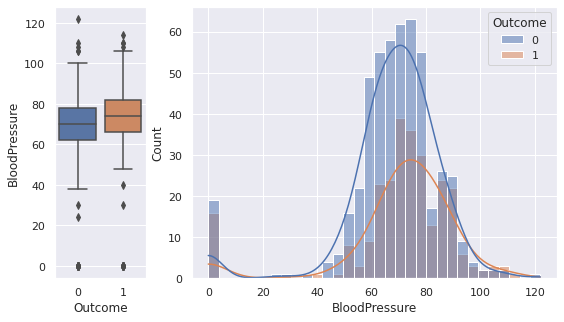

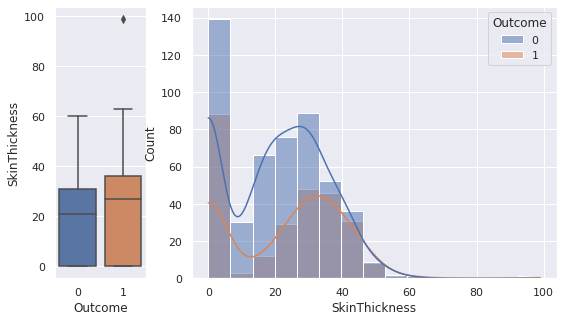

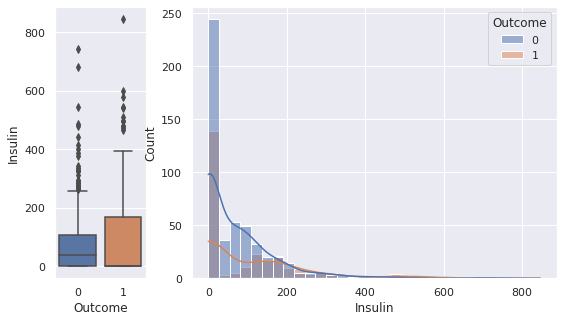

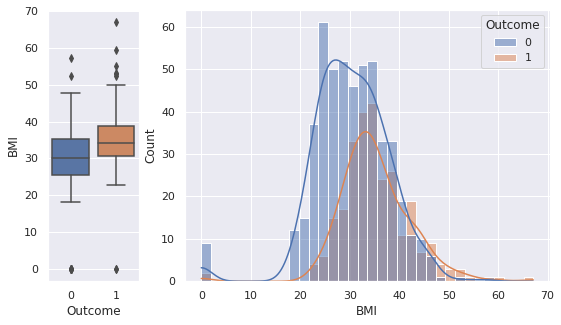

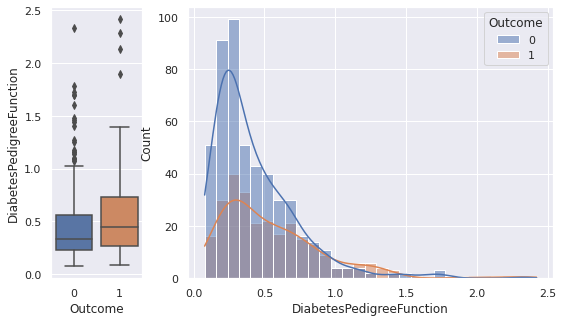

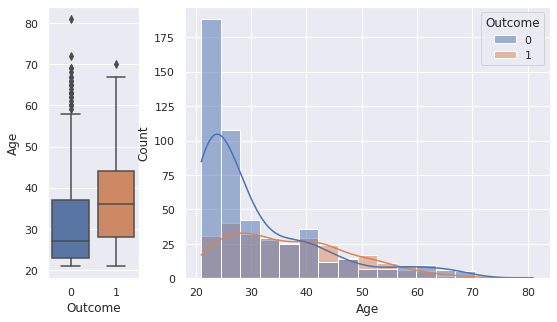

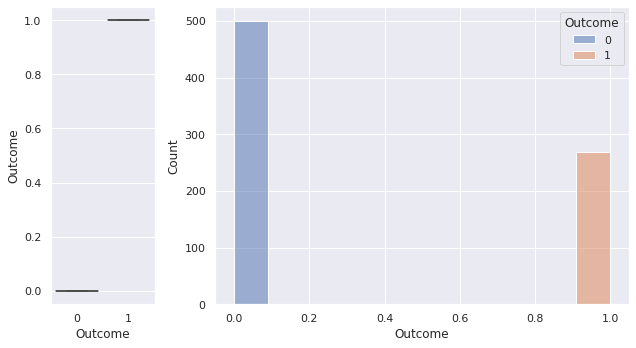

In [8]:
# comparing distributions
for i,c in enumerate(data[:-1]):
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    sns.boxplot(x ='Outcome', y =c, data = data, ax = axes[0])
    sns.histplot(hue ='Outcome', x = c, data = data, ax = axes[1], kde = True)
    
plt.tight_layout()

# On data pre-processing

## Treatment of lost values

In [9]:
data = data.dropna()
data.shape # does nothing!

(768, 9)

In [10]:
# We mark missing values as NA
data.Glucose[data.Glucose == 0] = np.nan
data.BloodPressure[data.BloodPressure == 0] = np.nan
data.SkinThickness[data.SkinThickness == 0] = np.nan
data.BMI[data.BMI == 0] = np.nan
data.Insulin[(data.Insulin == 0) & (data.Outcome == 0)] = np.nan

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,0.0,30.1,0.349,47,1


In [11]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     236
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Text(0.5, 1.0, 'Quantifying missing data')

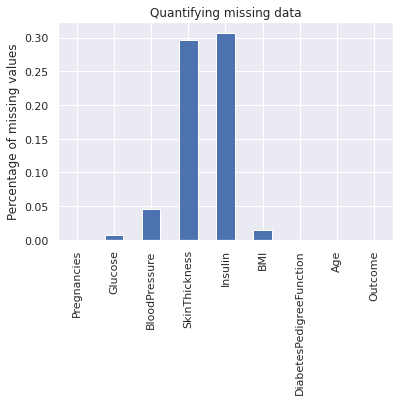

In [12]:
# ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data.isnull().mean().plot.bar()
plt.ylabel('Percentage of missing values')
plt.title('Quantifying missing data')

In [13]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,763.000,733.000,541.000,532.000,757.000,768.000,768.000,768.000
mean,3.845,121.687,72.405,29.153,115.199,32.457,0.472,33.241,0.349
std,3.370,30.536,12.382,10.477,122.875,6.925,0.331,11.760,0.477
min,0.000,44.000,24.000,7.000,0.000,18.200,0.078,21.000,0.000
25%,1.000,99.000,64.000,22.000,0.000,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,29.000,91.500,32.300,0.372,29.000,0.000
75%,6.000,141.000,80.000,36.000,165.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [14]:

data.dropna(thresh=8,inplace=True)

In [15]:
data.isnull().sum()

Pregnancies                  0
Glucose                      3
BloodPressure                1
SkinThickness               72
Insulin                     93
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [16]:
data.isnull().mean()

Pregnancies                 0.000
Glucose                     0.005
BloodPressure               0.002
SkinThickness               0.118
Insulin                     0.153
BMI                         0.002
DiabetesPedigreeFunction    0.000
Age                         0.000
Outcome                     0.000
dtype: float64

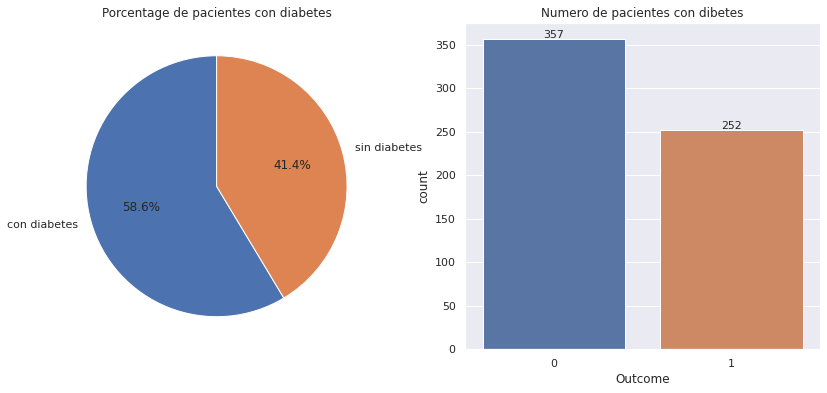

In [17]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.pie(data['Outcome'].value_counts(), autopct = "%1.1f%%",labels=["con diabetes","sin diabetes"], startangle = 90)
t1 = ax1.set_title('Porcentage de pacientes con diabetes')

sns.countplot(data['Outcome'],ax = ax2)
t2 = ax2.set_title('Numero de pacientes con dibetes')
# show count (+ annotate)
for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)


plt.show();

In [18]:
data_missings = data.copy()  
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,0.0,30.1,0.349,47,1


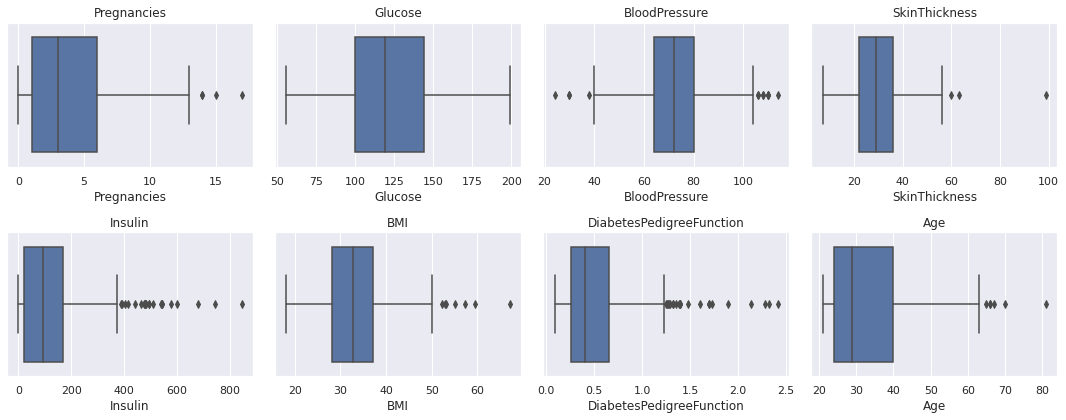

In [19]:
# Box plots 
fig, axes = plt.subplots(2,4,figsize=(15,6))
for i, c in enumerate(data.columns[:-1]):
    ax = axes.reshape(-1)[i]
    sns.boxplot(data[c],ax=ax)

    t = ax.set_title(c)
plt.tight_layout()
# sns.boxplot(data.BMI) # no mean



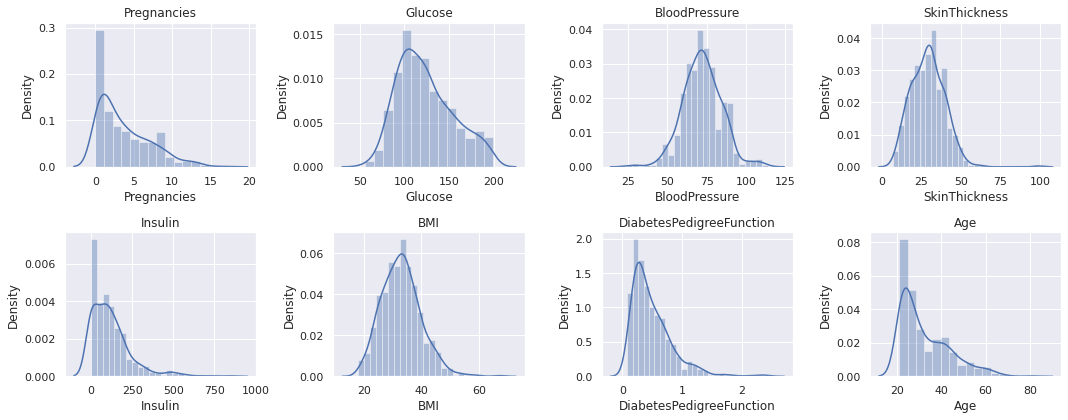

In [20]:
# Distribution plots
fig, axes = plt.subplots(2,4,figsize=(15,6))
for i, c in enumerate(data.columns[:-1]):
    ax = axes.reshape(-1)[i]
    sns.distplot(data[c],ax=ax)

    t = ax.set_title(c)
plt.tight_layout()


In [21]:
data.Glucose.fillna(int(data.Glucose.mean()),inplace=True)
data.BloodPressure.fillna(int(data.BloodPressure.mean()),inplace=True)
data.BMI.fillna(data.BMI.median(),inplace=True)

imputer = KNNImputer(n_neighbors=1,weights='distance',copy=True)
data = pd.DataFrame(
    imputer.fit_transform(data), 
    columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
)


## Outliers

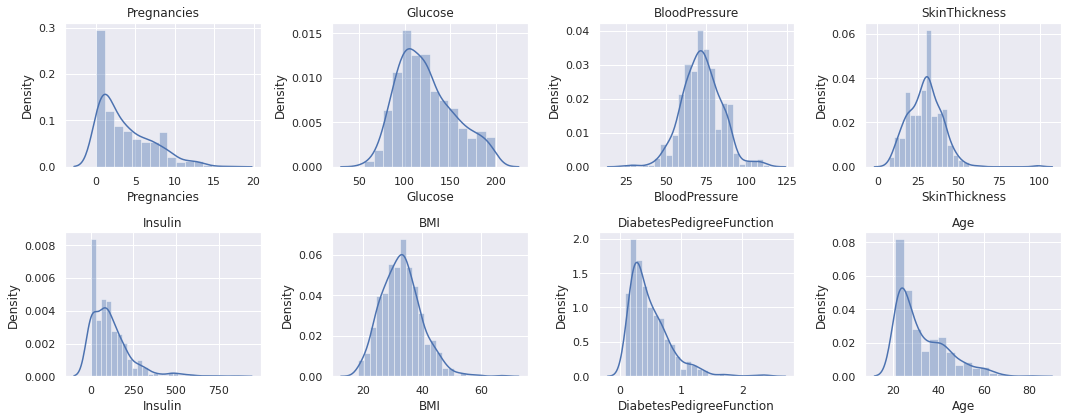

In [22]:
# Distribution plots
fig, axes = plt.subplots(2,4,figsize=(15,6))
for i, c in enumerate(data.columns[:-1]):
    ax = axes.reshape(-1)[i]
    sns.distplot(data[c],ax=ax)

    t = ax.set_title(c)
plt.tight_layout()


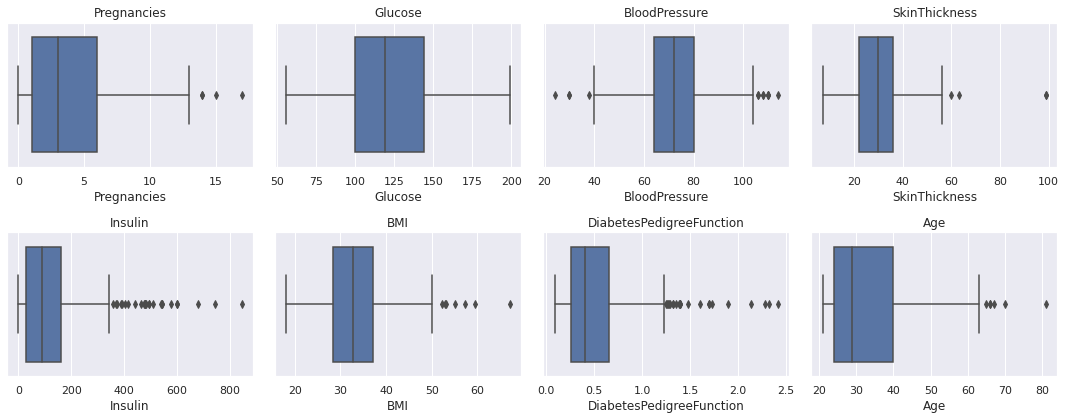

In [23]:
fig, axes = plt.subplots(2,4,figsize=(15,6))
for i, c in enumerate(data.columns[:-1]):
    ax = axes.reshape(-1)[i]
    sns.boxplot(data[c],ax=ax)

    t = ax.set_title(c)
plt.tight_layout()

In [24]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,609.000,609.000,609.000,609.000,609.000,609.000,609.000,609.000,609.000
mean,3.754,123.452,72.108,29.552,115.066,33.056,0.495,32.571,0.414
std,3.356,31.109,12.297,10.577,119.376,6.825,0.341,11.146,0.493
min,0.000,56.000,24.000,7.000,0.000,18.200,0.085,21.000,0.000
25%,1.000,100.000,64.000,22.000,29.000,28.300,0.257,24.000,0.000
50%,3.000,119.000,72.000,30.000,91.000,32.800,0.403,29.000,0.000
75%,6.000,144.000,80.000,36.000,160.000,37.100,0.652,40.000,1.000
max,17.000,199.000,114.000,99.000,846.000,67.100,2.420,81.000,1.000


In [25]:
data.drop(index=579)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,106.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
604,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
605,2.0,122.0,70.0,27.0,205.0,36.8,0.340,27.0,0.0
606,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
607,1.0,126.0,60.0,39.0,0.0,30.1,0.349,47.0,1.0


## Normalization

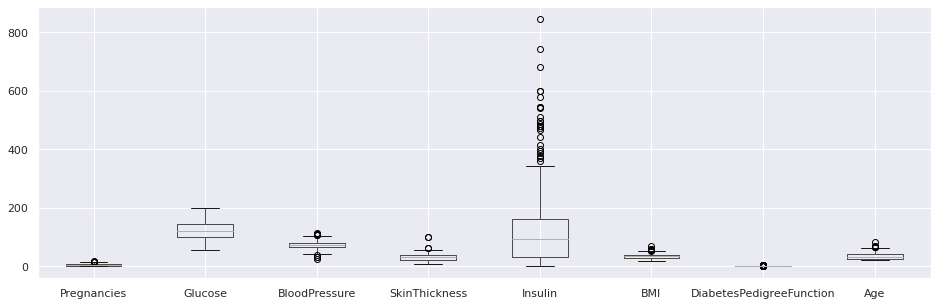

In [26]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target = 'Outcome'
X, y = data[features].values, data[target].values


data.loc[:,features].boxplot(figsize=(16, 5));

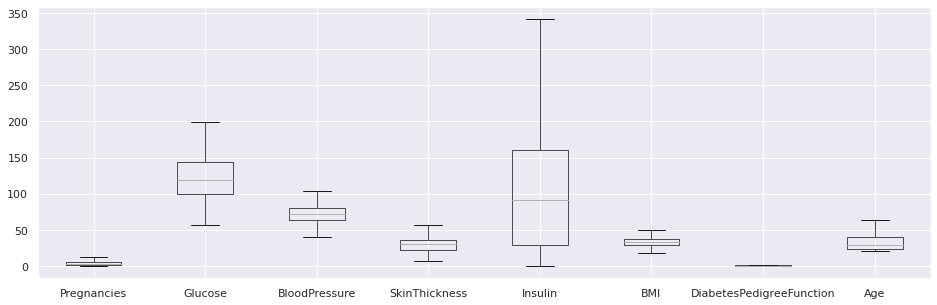

In [27]:
data.loc[:,features].boxplot(figsize=(16, 5),showfliers=False);

## Visualization (PCA)

In [28]:
data_vis = data.copy()
data_vis.Outcome.replace([0,1], ['No diabetic','Daibetic'], inplace=True)
X_standarized = data_vis.copy()
X_standarized[features] = StandardScaler().fit_transform(X)
X_standarized.describe()

myPCA = PCA()
myPCA.fit(X_standarized[features])
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())


[0.28922688 0.18754844 0.14620375 0.11590729 0.09193571 0.07483989
 0.05099357 0.04334447]
[0.28922688 0.47677532 0.62297907 0.73888636 0.83082207 0.90566196
 0.95665553 1.        ]


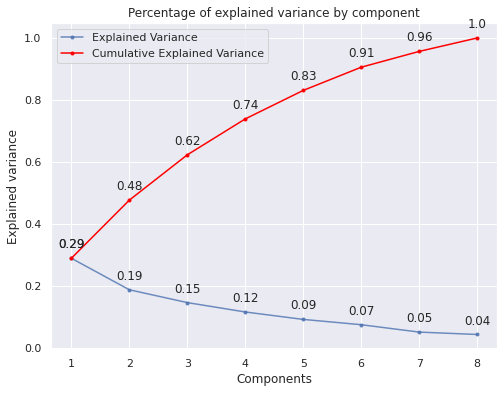

In [29]:

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Explained Variance");
y_label = plt.ylabel('Explained variance');
x_label = plt.xlabel('Components');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Cumulative Explained Variance");

for x, y in zip(np.arange(len(features)) + 1, np.cumsum(myPCA.explained_variance_ratio_)):
    label = round(y, 2)
    plt.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
for x, y in zip(np.arange(len(features)) + 1,myPCA.explained_variance_ratio_):
    label = round(y, 2)
    plt.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
plt.legend();
plt.title('Percentage of explained variance by component');

In [30]:
pd.DataFrame(
    data    = myPCA.components_,
    columns = features,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8']
)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC1,0.343,0.405,0.413,0.414,0.134,0.403,0.110,0.429
PC2,-0.533,0.120,-0.110,0.329,0.328,0.431,0.258,-0.471
PC3,0.067,0.416,-0.227,-0.355,0.629,-0.338,0.338,0.148
PC4,0.143,-0.205,-0.124,0.028,-0.386,0.012,0.877,0.055
PC5,0.375,-0.095,-0.786,0.427,0.096,0.077,-0.171,0.077
PC6,0.187,-0.754,0.222,-0.065,0.556,0.160,0.065,0.068
PC7,-0.483,-0.163,0.061,0.514,0.066,-0.519,0.041,0.443
PC8,-0.405,-0.060,-0.283,-0.379,-0.083,0.486,-0.057,0.602


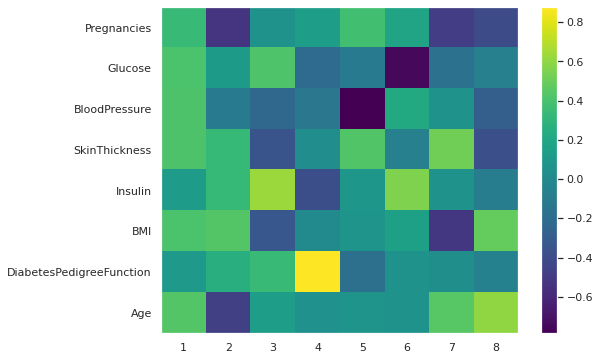

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
componentes = myPCA.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(features)), features)
plt.xticks(range(len(features)), np.arange(myPCA.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [32]:
correlation_mat = data.corr() 
correlation_mat.style.background_gradient(cmap='viridis').set_precision(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.16,0.22,0.10,-0.07,0.02,-0.02,0.59,0.30
Glucose,0.16,1.00,0.24,0.24,0.30,0.24,0.13,0.30,0.51
BloodPressure,0.22,0.24,1.00,0.23,-0.02,0.32,-0.01,0.36,0.21
SkinThickness,0.10,0.24,0.23,1.00,0.05,0.58,0.07,0.15,0.26
Insulin,-0.07,0.30,-0.02,0.05,1.00,0.12,0.11,0.01,-0.06
BMI,0.02,0.24,0.32,0.58,0.12,1.00,0.12,0.06,0.28
DiabetesPedigreeFunction,-0.02,0.13,-0.01,0.07,0.11,0.12,1.00,0.02,0.16
Age,0.59,0.30,0.36,0.15,0.01,0.06,0.02,1.00,0.36
Outcome,0.30,0.51,0.21,0.26,-0.06,0.28,0.16,0.36,1.00


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

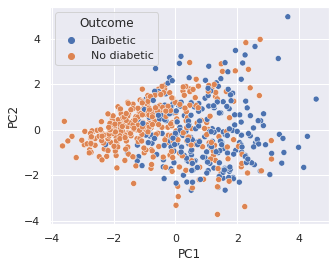

In [33]:
data_vis = data.copy()
data_vis.Outcome.replace([0,1], ['No diabetic','Daibetic'], inplace=True)

transformed_X = myPCA.transform(X_standarized[features])
X_standarized[['PC1','PC2', 'PC3','PC4','PC5','PC6']] = transformed_X[:,:6]
fig = plt.figure(figsize=(5,4))
sns.scatterplot(x='PC1', y='PC2', hue=target, data=X_standarized)

# Transition pre-processing to modeling

In [34]:
np.random.seed(144)
data_new = data.sample(frac=1).reset_index(drop=True)
data_new.to_pickle('dataset/Diabetes-processed.pkl.bz2',compression='bz2')

X = data_new.drop('Outcome',axis='columns')
y = data_new['Outcome']

N = data_new.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=N//3, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

X_train.to_pickle('dataset/Diabetes-processed-X_train.pkl.bz2',compression='bz2')
y_train.to_pickle('dataset/Diabetes-processed-y_train.pkl.bz2',compression='bz2')
X_test.to_pickle('dataset/Diabetes-processed-X_test.pkl.bz2',compression='bz2')
y_test.to_pickle('dataset/Diabetes-processed-y_test.pkl.bz2',compression='bz2')

Training cases: 406
Test cases: 203


# Modeling

In [35]:
def train_data():
    data = pd.read_pickle('dataset/Diabetes-processed.pkl.bz2', compression='bz2')

    X = data.drop('Outcome',axis='columns')
    y = data['Outcome']

    X_train = pd.read_pickle('dataset/Diabetes-processed-X_train.pkl.bz2', compression='bz2')
    y_train = pd.read_pickle('dataset/Diabetes-processed-y_train.pkl.bz2', compression='bz2')
    X_test  = pd.read_pickle('dataset/Diabetes-processed-X_test.pkl.bz2', compression='bz2')
    y_test  = pd.read_pickle('dataset/Diabetes-processed-y_test.pkl.bz2', compression='bz2')

    return X, y, X_train, X_test, y_train, y_test


In [36]:
gridSearch = True

## K nearest neighbours

In [37]:
X, y, X_train, X_test, y_train, y_test = train_data()
mms = MinMaxScaler().fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

if gridSearch:
    param = {'n_neighbors':[1,2,3,4,5,6,7,23,45,89], 'weights':['distance', 'uniform'], 'algorithm':['auto','ball_tree','kd_tree','brute']}
else :
    param = {'algorithm': ['auto'], 'n_neighbors': [23], 'weights': ['distance']} 
    
model =  KNeighborsClassifier()
grid =  GridSearchCV(model,param,cv=5, n_jobs=-1, refit=True)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
test_acc = best_model.score(X=X_test, y=y_test)
train_acc = best_model.score(X=X_train, y=y_train)

print('\nK nearest neighbors:')
print('- Best Params:', grid.best_params_)
print(f'- Accuracy: {{ train: {train_acc:.3f}, CV: {grid.best_score_:.3f}, test: {test_acc:.3f}}}')


K nearest neighbors:
- Best Params: {'algorithm': 'auto', 'n_neighbors': 23, 'weights': 'distance'}
- Accuracy: { train: 1.000, CV: 0.788, test: 0.773}


In [38]:
show_html(pd.DataFrame(grid.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
14,"{'algorithm': 'auto', 'n_neighbors': 23, 'weights': 'distance'}",0.788,1
34,"{'algorithm': 'ball_tree', 'n_neighbors': 23, 'weights': 'distance'}",0.788,1
74,"{'algorithm': 'brute', 'n_neighbors': 23, 'weights': 'distance'}",0.788,1
54,"{'algorithm': 'kd_tree', 'n_neighbors': 23, 'weights': 'distance'}",0.788,1
70,"{'algorithm': 'brute', 'n_neighbors': 6, 'weights': 'distance'}",0.786,5


In [39]:
print(classification_report(y_test,grid.predict(X_test),target_names=['NoDef', 'Def'], digits=3))

cm = confusion_matrix(y_test, grid.predict(X_test))
print ('\nConfusion matrix: \n', cm)

              precision    recall  f1-score   support

       NoDef      0.815     0.815     0.815       124
         Def      0.709     0.709     0.709        79

    accuracy                          0.773       203
   macro avg      0.762     0.762     0.762       203
weighted avg      0.773     0.773     0.773       203


Confusion matrix: 
 [[101  23]
 [ 23  56]]


## Logistic regression

In [40]:

X, y, X_train, X_test, y_train, y_test = train_data() # loading data
mms = StandardScaler().fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

if gridSearch:
    c_dist = uniform(0.01, 2) # continuous value
    elastic_l1_ratio = uniform(0, 1)
    # not all combinations are valid, thats why I use a list of dicts
    parameters = [{"C": c_dist, "solver":["newton-cg"], "penalty": ["l2"], "dual": [False]},
        {"C": c_dist, "solver":["lbfgs"], "penalty": ["l2"], "dual": [False]},
        {"C": c_dist, "solver":["liblinear"], "penalty": ["l1"], "dual": [False]},
        {"C": c_dist, "solver":["liblinear"], "penalty": ["l2"], "dual": [False]},
        {"C": c_dist, "solver":["sag"], "penalty": ["l2"], "dual": [False]},
        {"C": c_dist, "solver":["saga"], "penalty": ["l1", "l2"], "dual": [False]},
        {"solver":["saga"], "penalty": ["none"], "dual": [False]},
        {"C": c_dist, "solver":["saga"], "penalty": ["elasticnet"], "dual": [False], "l1_ratio": elastic_l1_ratio}]
else :
    parameters = {'C': [0.8840639075986829], 'dual': [False], 'l1_ratio': [0.6976311959272649], 'penalty': ['elasticnet'], 'solver': ['saga']} 

model = LogisticRegression()
grid = RandomizedSearchCV(model, parameters, n_iter=6000, cv=5, random_state=0, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
test_acc = best_model.score(X=X_test, y=y_test)
train_acc = best_model.score(X=X_train, y=y_train)

print('\nLogisitc Regression:')
print('- Best Params:', grid.best_params_)
print(f'- Accuracy: {{ train: {train_acc:.3f}, CV: {grid.best_score_:.3f}, test: {test_acc:.3f}}}')

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits

Logisitc Regression:
- Best Params: {'C': 0.8840639075986829, 'dual': False, 'l1_ratio': 0.6976311959272649, 'penalty': 'elasticnet', 'solver': 'saga'}
- Accuracy: { train: 0.813, CV: 0.813, test: 0.798}


In [41]:
pd.DataFrame(grid.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
2999,"{'C': 0.9082004051435038, 'dual': False, 'pena...",0.813,1
396,"{'C': 0.8155335193463675, 'dual': False, 'pena...",0.813,1
1877,"{'C': 0.8989874467166934, 'dual': False, 'pena...",0.813,1
4025,"{'C': 0.517788936253242, 'dual': False, 'l1_ra...",0.813,1
382,"{'C': 0.9512978984278191, 'dual': False, 'pena...",0.813,1


In [42]:
print(classification_report(y_test,grid.predict(X_test),target_names=['NoDef', 'Def'], digits=3))

cm = confusion_matrix(y_test, grid.predict(X_test))
print ('\nConfusion matrix: \n', cm)

              precision    recall  f1-score   support

       NoDef      0.817     0.863     0.839       124
         Def      0.764     0.696     0.728        79

    accuracy                          0.798       203
   macro avg      0.790     0.780     0.784       203
weighted avg      0.796     0.798     0.796       203


Confusion matrix: 
 [[107  17]
 [ 24  55]]


## Linear SVM

In [43]:
X, y, X_train, X_test, y_train, y_test = train_data() # loading data
mms = StandardScaler().fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

if gridSearch:
    c_dist = uniform(0.01, 2) 
    # not all combinations are valid, thats why I use a list of dicts (l1 with hinge)
    parameters = [{'C': c_dist,  'penalty': ['l1'], 'loss': ['squared_hinge'], 'dual': [False]},
        {'C': c_dist,  'penalty': ['l2'], 'loss': ['hinge','squared_hinge'], 'dual': [False]}]
else:
    parameters = {'C': [1.1956892364500367], 'dual': [False], 'loss': ['squared_hinge'], 'penalty': ['l1']} 

model = svm.LinearSVC(tol = 0.00005)
grid = RandomizedSearchCV(model, parameters, cv=5, random_state=0, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
test_acc = best_model.score(X=X_test, y=y_test)
train_acc = best_model.score(X=X_train, y=y_train)

print('\nLinear SVM:')
print('- Best Params:', grid.best_params_)
print(f'- Accuracy: {{ train: {train_acc:.3f}, CV: {grid.best_score_:.3f}, test: {test_acc:.3f}}}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Linear SVM:
- Best Params: {'C': 1.1956892364500367, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
- Accuracy: { train: 0.815, CV: 0.813, test: 0.798}


In [44]:
pd.DataFrame(grid.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
0,"{'C': 1.1956892364500367, 'dual': False, 'loss...",0.813,1
1,"{'C': 1.2155267521432878, 'dual': False, 'loss...",0.813,1
5,"{'C': 0.7768830376515554, 'dual': False, 'loss...",0.813,1
6,"{'C': 1.6343374575509864, 'dual': False, 'loss...",0.813,1
7,"{'C': 1.1460891221878646, 'dual': False, 'loss...",0.813,1


In [45]:
print(classification_report(y_test,grid.predict(X_test),target_names=['NoDef', 'Def'], digits=3))

cm = confusion_matrix(y_test, grid.predict(X_test))
print ('\nConfusion matrix: \n', cm)

              precision    recall  f1-score   support

       NoDef      0.817     0.863     0.839       124
         Def      0.764     0.696     0.728        79

    accuracy                          0.798       203
   macro avg      0.790     0.780     0.784       203
weighted avg      0.796     0.798     0.796       203


Confusion matrix: 
 [[107  17]
 [ 24  55]]


## SVM with RBF Kernel

In [46]:
X, y, X_train, X_test, y_train, y_test = train_data() # loading data
mms = StandardScaler().fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

if gridSearch:
    c_dist = uniform(0.01, 2)
    param = {"C": c_dist, "gamma": ["scale", "auto"]}
else :
    param = {'C': [0.27497526951596596], 'gamma': ['scale']} 

model = svm.SVC(kernel="rbf")
grid = RandomizedSearchCV(model, param, n_iter=1000, cv=5, random_state=0, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
test_acc = best_model.score(X=X_test, y=y_test)
train_acc = best_model.score(X=X_train, y=y_train)

print('\nSVM with RBF kernel:')
print('- Best Params:', grid.best_params_)
print(f'- Accuracy: {{ train: {train_acc:.3f}, CV: {grid.best_score_:.3f}, test: {test_acc:.3f}}}')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

SVM with RBF kernel:
- Best Params: {'C': 0.27497526951596596, 'gamma': 'scale'}
- Accuracy: { train: 0.828, CV: 0.795, test: 0.788}


In [47]:
pd.DataFrame(grid.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
227,"{'C': 0.27693041916272443, 'gamma': 'scale'}",0.795,1
307,"{'C': 0.2756299975373877, 'gamma': 'scale'}",0.795,1
489,"{'C': 0.2738064994807585, 'gamma': 'scale'}",0.795,1
374,"{'C': 0.2769229418698689, 'gamma': 'scale'}",0.795,1
204,"{'C': 0.27497526951596596, 'gamma': 'scale'}",0.795,1


In [48]:
print(classification_report(y_test,grid.predict(X_test),target_names=['NoDef', 'Def'], digits=3))

cm = confusion_matrix(y_test, grid.predict(X_test))
print ('\nConfusion matrix: \n', cm)

              precision    recall  f1-score   support

       NoDef      0.840     0.806     0.823       124
         Def      0.714     0.759     0.736        79

    accuracy                          0.788       203
   macro avg      0.777     0.783     0.780       203
weighted avg      0.791     0.788     0.789       203


Confusion matrix: 
 [[100  24]
 [ 19  60]]


## Random Forest

In [49]:
X, y, X_train, X_test, y_train, y_test = train_data() # loading data

if gridSearch:
    n_est = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
    max_d = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    max_d.append(None)
    parameters = {'n_estimators': n_est, 'max_features': ['auto','sqrt'], 'bootstrap': [True,False], 'max_depth': max_d, 'min_samples_split': [5, 6, 8, 10], 'min_samples_leaf': [1, 2, 4]}
else :
    parameters = {'n_estimators': [889], 'min_samples_split': [10], 'min_samples_leaf': [2], 'max_features': ['sqrt'], 'max_depth': [800], 'bootstrap': [True]} 

model = RandomForestClassifier()
grid = RandomizedSearchCV(model, parameters, n_iter=1000, cv=5, random_state=0, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
test_acc = best_model.score(X=X_test, y=y_test)
train_acc = best_model.score(X=X_train, y=y_train)

print('\nRandom Forest:')
print('- Best Params:', grid.best_params_)
print(f'- Accuracy: {{ train: {train_acc:.3f}, CV: {grid.best_score_:.3f}, test: {test_acc:.3f}}}')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits

Random Forest:
- Best Params: {'n_estimators': 112, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 1200, 'bootstrap': True}
- Accuracy: { train: 0.931, CV: 0.835, test: 0.803}


In [50]:
pd.DataFrame(grid.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score
13,"{'n_estimators': 112, 'min_samples_split': 10,...",0.835,1
5,"{'n_estimators': 112, 'min_samples_split': 10,...",0.835,2
885,"{'n_estimators': 223, 'min_samples_split': 6, ...",0.832,3
938,"{'n_estimators': 889, 'min_samples_split': 6, ...",0.832,4
742,"{'n_estimators': 556, 'min_samples_split': 10,...",0.832,4
...,...,...,...
709,"{'n_estimators': 1, 'min_samples_split': 6, 'm...",0.687,996
992,"{'n_estimators': 1, 'min_samples_split': 6, 'm...",0.685,997
388,"{'n_estimators': 1, 'min_samples_split': 5, 'm...",0.682,998
847,"{'n_estimators': 1, 'min_samples_split': 8, 'm...",0.680,999


In [51]:
print(classification_report(y_test,grid.predict(X_test),target_names=['NoDef', 'Def'], digits=3))

cm = confusion_matrix(y_test, grid.predict(X_test))
print ('\nConfusion matrix: \n', cm)

              precision    recall  f1-score   support

       NoDef      0.862     0.806     0.833       124
         Def      0.724     0.797     0.759        79

    accuracy                          0.803       203
   macro avg      0.793     0.802     0.796       203
weighted avg      0.808     0.803     0.804       203


Confusion matrix: 
 [[100  24]
 [ 16  63]]
